# Exploring the functionality within the `romeo.LinearRegression` class

In [27]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
import session_info

In [2]:
current_wd = os.getcwd()
os.chdir(current_wd.split("/notebook")[0])
from romeo.linear_model import LinearRegression
os.chdir(current_wd)

In [3]:
session_info.show(write_req_file=False)

## Make X and y data

In [4]:
amount_of_features = 4
X, y, coef = make_regression(n_samples=100,
    n_features=amount_of_features,
    n_informative=amount_of_features,
                             noise=5,
                             coef=True, 
                            random_state=42)

In [5]:
coef

array([86.47223763,  5.63754967, 27.34070719, 41.48195023])

## Fit the model

In [6]:
df = (pd.DataFrame(X, columns=[f"feat_{x}" for x in range(0, X.shape[1])])
.merge(pd.DataFrame(y, columns=["target"]),
      left_index=True,
      right_index=True))

In [7]:
df.head()

,feat_0,feat_1,feat_2,feat_3,target
0,0.852433,-0.661786,0.186454,-2.025143,-8.751790
1,-0.493001,-0.208122,-0.622700,0.280992,-40.948309
2,-1.142970,0.058209,0.153725,-0.883857,-126.192510
3,0.375698,-1.150994,0.110923,-0.544383,7.050788
4,-1.196207,-1.106335,-0.185659,-0.479174,-134.050438


In [8]:
df_train = df.sample(frac=0.8, random_state=69420)
df_test = df.drop(df_train.index)

In [9]:
df_train.shape, df_test.shape

((80, 5), (20, 5))

## Currently the romeo LinearRegression function requires the inputs to be pandas (DataFrame, and Series)

Otherwise the fit_intercept = True, does not work, nor will the calls to X.values

In [10]:
reg = LinearRegression(fit_intercept=True).fit(X=df_train.filter(regex="feat"), y=df_train["target"])


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       15

Total number of variables............................:        5
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equal

In [11]:
reg.coef_#, reg.intercept_#, reg.score(X, y)

,coef
intercept,-0.171726
feat_0,87.155885
feat_1,5.751563
feat_2,26.934038
feat_3,40.459461


## Show the available methods and attributes of the fitted model

In [12]:
np.array(dir(reg))

array(['__class__', '__delattr__', '__dict__', '__dir__', '__doc__',
       '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__',
       '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__',
       '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__',
       '__repr__', '__setattr__', '__sizeof__', '__str__',
       '__subclasshook__', '__weakref__', 'coef_', 'copy_X', 'fit',
       'fit_intercept', 'normalize', 'positive', 'predict'], dtype='<U17')

In [13]:
intercept = reg.coef_.loc["intercept", :].values[0]
coefs = reg.coef_.drop("intercept").values

In [14]:
coefs

array([[87.1558853 ],
       [ 5.75156338],
       [26.93403819],
       [40.45946059]])

In [15]:
coefs.reshape(1,-1)

array([[87.1558853 ,  5.75156338, 26.93403819, 40.45946059]])

In [16]:
coefs.reshape(1,-1)*df_train.filter(regex="feat").head()

,feat_0,feat_1,feat_2,feat_3
30,68.998063,6.660948,-32.703002,-40.702921
4,-104.256447,-6.363156,-5.000546,-19.387131
71,-93.931800,0.369711,29.329837,-19.094109
50,81.166543,5.929859,16.474913,-27.387899
56,-40.891419,6.783625,49.328580,-53.415923


## Plot the original data and the lines of best fit for each of the predictors on the target

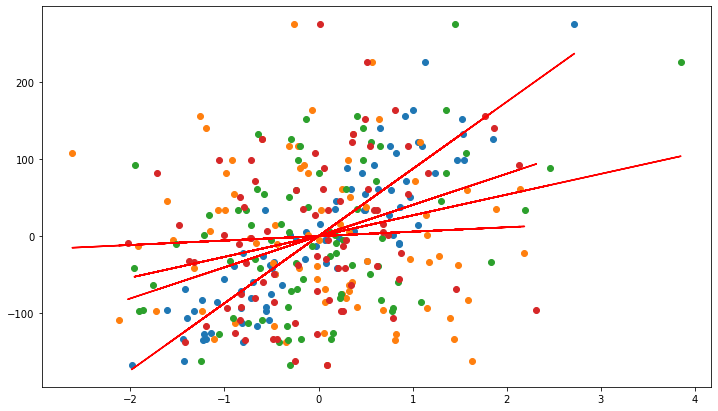

In [17]:
_ = plt.figure(figsize=(12, 7))
_ = plt.plot(df_train.filter(regex="feat"), 
             df_train["target"], 
             'o', 
             label='original data')
_ = plt.plot(df_train.filter(regex="feat"), 
             intercept + coefs.reshape(1,-1)*df_train.filter(regex="feat"), 
             'r', 
             label='fitted line')
# _ = plt.legend()

## With the fitted model attempt to predict the test data

In [24]:
y_pred = reg.predict(df_test.filter(regex="feat"))
y_pred.head(2)

,coef
9,29.883108
23,219.968612


In [25]:
y_test = df_test[["target"]]
y_test.head(2)

,target
9,34.902372
23,219.457181


## Calculate the r2 between the predicted vs the real scores

In [35]:
r_sq = r2_score(y_test["target"], 
        y_pred["coef"])
r_sq

0.9978264715032888

## Plot the predicted vs the real values

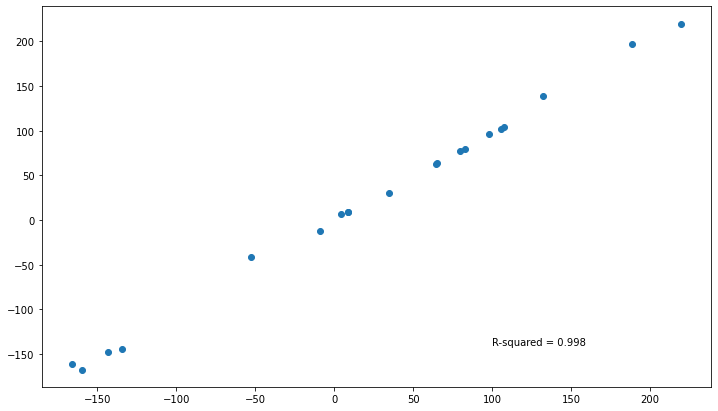

In [40]:
_ = plt.figure(figsize=(12, 7))
_ = plt.plot(y_test["target"], 
             y_pred["coef"], 
             'o', 
#              label='original data'
            )
_ = plt.annotate(text = f"R-squared = {round(r_sq, 3)}",
                 xy=(100, -140),)